In [1]:
def bed_line_cluster_array(line, cluster_start, cluster_stop):
    line = line.rstrip().split('\t')
    read_start = int(line[1])
    read_stop = int(line[2])
    blocks = [int(x) for x in line[10].split(',')]
    starts = [int(x) for x in line[11].split(',')]

    cluster_idxs = {pos: None for pos in range(cluster_start, cluster_stop+1)}
    for pos in range(read_start, read_stop+1):
        if pos in cluster_idxs:
            cluster_idxs[pos] = 0.0

    for st, bl in zip(starts, blocks):
        for x in range(read_start+st, read_start+st+bl+1):
            if x in cluster_idxs:
                cluster_idxs[x] = 1
    cluster_array = [a[1] for a in sorted(cluster_idxs.items(), key=lambda x: x[0])]
    return cluster_array

In [10]:
def pct_full(arr):
    n_none = sum(1 for x in arr if x is None)
    return 1 - float(n_none) / len(arr)

In [18]:
def convert_nones(arr):
    return [x if x is not None else -1 for x in arr]

In [20]:
acc = []
with open("/data/Research/addseq/cln2.converted.sma.bed", 'r') as bedfile:
    next(bedfile)
    for line in bedfile:
        arr = bed_line_cluster_array(line, cluster_start=66400, cluster_stop=67500)
        if pct_full(arr) > 0.8:
            acc.append(convert_nones(arr))


In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=3)

In [23]:
cluster_results = kmeans.fit_predict(acc)

In [25]:
from collections import defaultdict

def split_clusters(cresults, carrays):
    labels = defaultdict(list)
    for idx, res in enumerate(carrays):
        label = cresults[idx]
        labels[label].append(res)
    return labels

In [26]:
labeled_arrays = split_clusters(cluster_results, acc)

In [27]:
import matplotlib.pyplot as plt

([<matplotlib.axis.XTick at 0x7fd2ffd660b0>,
 [Text(0, 0, '66400'),
  Text(200, 0, '66600'),
  Text(400, 0, '66800'),
  Text(600, 0, '67000'),
  Text(800, 0, '67200'),
  Text(1000, 0, '67400')])

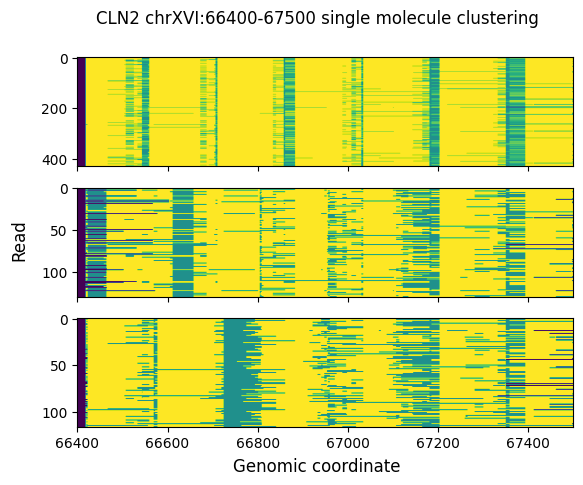

In [45]:
fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True)
for idx, arrs in labeled_arrays.items():
    axs[idx].imshow(arrs, aspect="auto")
# plt.tight_layoutg(pad=0.7)
fig.suptitle("CLN2 chrXVI:66400-67500 single molecule clustering")
fig.supylabel("Read")
fig.supxlabel("Genomic coordinate")
plt.xticks(ticks=range(0, 1101, 200), labels=range(66400, 67501, 200))